In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import dataframe_image as dfi
import math

In [13]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [2]:
ingresos = pd.read_csv('ingresos_2021.csv', encoding ='Latin1')
ingresos

,ï»¿FOLIO,ANIO,TRIM,FECHA,CONCESIONARIO,K_EMPRESA,EMPRESA,K_GRUPO,GRUPO,I_FIJO_MOVIL,INGRESOS_TOTAL_E
0,100028,2021,4,15DEC2021,ADOLFO MERINO MEDINA,C0089,CABLEMAS,G004,GRUPO TELEVISA,Fijo,434431.00
1,100029,2021,4,15DEC2021,AGUSTIN PEREZ VIEYRA,C0009,AGUSTIN PEREZ VIEYRA,C009,AGUSTIN PEREZ VIEYRA,Fijo,682018.80
2,100065,2021,4,15DEC2021,ARELY ISABEL GONGORA PECH,C0046,ARELY ISABEL GONGORA PECH,C046,ARELY ISABEL GONGORA PECH,Fijo,1149516.00
3,100142,2021,4,15DEC2021,FRANCISCO GUERRA GARCIA,C0666,FRANCISCO GUERRA GARCIA,C666,FRANCISCO GUERRA GARCIA,FIJO,1947843.00
4,100147,2021,4,15DEC2021,GABRIEL BUTRON CHIAPA,C0199,GABRIEL BUTRON CHIAPA,C199,GABRIEL BUTRON CHIAPA,Fijo,1109813.00
...,...,...,...,...,...,...,...,...,...,...,...
128,519163,2021,4,15DEC2021,"CONVERGENCIA Y DESARROLLO DIGITAL, S.A. DE C.V.",C0807,RED DOG,C807,RED DOG,Fijo y OMV,1460571.89
129,519208,2021,4,15DEC2021,"TELMOV MOVIL, S.A. DE C.V.",C0080,TELMOVIL,C080,TELMOVIL,OMV,188109.28
130,519363,2021,4,15DEC2021,"MARKETING 358, S.A. DE C.V.",C0473,MARKETING 358,C473,MARKETING 358,OMV,1924097.07
131,519422,2021,4,15DEC2021,"BROCOMUNICACIONES MOVILES, S.A.P.I. DE C.V.",C0511,BROMOVIL,C511,BROMOVIL,OMV,237150.70


In [3]:
ingresos['GRUPO'].unique()

array(['GRUPO TELEVISA', 'AGUSTIN PEREZ VIEYRA',
       'ARELY ISABEL GONGORA PECH', 'FRANCISCO GUERRA GARCIA',
       'GABRIEL BUTRON CHIAPA', 'GUILLERMO MEDELLIN MILAN',
       'GUILLERMO ZARATE GARCIA', 'ISALIA MORENO ZETINA',
       'JAIME SANCHEZ SANCHEZ', 'JESUS MIGUEL FERNANDEZ GUERRERO',
       'JOSE JULIAN SACRAMENTO GARZA', 'MANUEL LOPEZ AVILA',
       'MARCO ANTONIO ROSALES HERRERA', 'ROBERTO LOPEZ BRAVO',
       'SARA QUIROZ CHAPA', 'TV-K', 'TELECAB', 'STARGROUP',
       'MEGACABLE-MCM', 'TELESISTEMAS PENINSULARES', 'AXTEL', 'GLOBALSAT',
       'TELECOM NACIONAL', 'TOTALPLAY', 'AXESAT', 'AIRECABLE',
       'USA TELECOM', 'COMCAB', 'SINOTECA',
       'COORDINADORA DE TV POR CABLE', 'TV OJO CALIENTE',
       'GTAC REDES DE FIBRA OPTICA', 'AMERICA MOVIL',
       'TELECABLE DE TICUL', 'EUTELSAT AMERICAS', 'MARCATEL',
       'LINK TE CONECTAMOS', 'HISPASAT', 'ELARA COMUNICACIONES',
       'CABLEVISION DE APATZINGAN', 'DISH-MVS', 'MAXICABLE',
       'BT LATAM MEXICO', 'TELECABLE 

In [4]:
ingresos.dtypes

ï»¿FOLIO              int64
ANIO                  int64
TRIM                  int64
FECHA                object
CONCESIONARIO        object
K_EMPRESA            object
EMPRESA              object
K_GRUPO              object
GRUPO                object
I_FIJO_MOVIL         object
INGRESOS_TOTAL_E    float64
dtype: object

In [5]:
ingresos_por_grupo = ingresos[['CONCESIONARIO', 'GRUPO', 'INGRESOS_TOTAL_E']]
ingresos_por_grupo.head()

,CONCESIONARIO,GRUPO,INGRESOS_TOTAL_E
0,ADOLFO MERINO MEDINA,GRUPO TELEVISA,434431.0
1,AGUSTIN PEREZ VIEYRA,AGUSTIN PEREZ VIEYRA,682018.8
2,ARELY ISABEL GONGORA PECH,ARELY ISABEL GONGORA PECH,1149516.0
3,FRANCISCO GUERRA GARCIA,FRANCISCO GUERRA GARCIA,1947843.0
4,GABRIEL BUTRON CHIAPA,GABRIEL BUTRON CHIAPA,1109813.0


In [6]:
ingresos_por_grupo.isna().sum()

CONCESIONARIO       0
GRUPO               0
INGRESOS_TOTAL_E    4
dtype: int64

In [7]:
ingresos_por_grupo['GRUPO'].unique()

array(['GRUPO TELEVISA', 'AGUSTIN PEREZ VIEYRA',
       'ARELY ISABEL GONGORA PECH', 'FRANCISCO GUERRA GARCIA',
       'GABRIEL BUTRON CHIAPA', 'GUILLERMO MEDELLIN MILAN',
       'GUILLERMO ZARATE GARCIA', 'ISALIA MORENO ZETINA',
       'JAIME SANCHEZ SANCHEZ', 'JESUS MIGUEL FERNANDEZ GUERRERO',
       'JOSE JULIAN SACRAMENTO GARZA', 'MANUEL LOPEZ AVILA',
       'MARCO ANTONIO ROSALES HERRERA', 'ROBERTO LOPEZ BRAVO',
       'SARA QUIROZ CHAPA', 'TV-K', 'TELECAB', 'STARGROUP',
       'MEGACABLE-MCM', 'TELESISTEMAS PENINSULARES', 'AXTEL', 'GLOBALSAT',
       'TELECOM NACIONAL', 'TOTALPLAY', 'AXESAT', 'AIRECABLE',
       'USA TELECOM', 'COMCAB', 'SINOTECA',
       'COORDINADORA DE TV POR CABLE', 'TV OJO CALIENTE',
       'GTAC REDES DE FIBRA OPTICA', 'AMERICA MOVIL',
       'TELECABLE DE TICUL', 'EUTELSAT AMERICAS', 'MARCATEL',
       'LINK TE CONECTAMOS', 'HISPASAT', 'ELARA COMUNICACIONES',
       'CABLEVISION DE APATZINGAN', 'DISH-MVS', 'MAXICABLE',
       'BT LATAM MEXICO', 'TELECABLE 

In [8]:
# Agrupados

ingresos_agrupados = ingresos_por_grupo.groupby(['GRUPO']).sum()
ingresos_agrupados

,INGRESOS_TOTAL_E
GRUPO,
ADDINTELI,2.462635e+06
AGUSTIN PEREZ VIEYRA,6.820188e+05
AIRECABLE,3.155851e+06
ALTAN,8.628394e+08
AMERICA MOVIL,8.655932e+10
...,...
VERIZON SERVICIOS EMPRESARIALES MEXICO,9.430599e+07
VIRGIN MOBILE,0.000000e+00
WEEX,8.026895e+06


In [10]:
ingresos_agrupados = ingresos_agrupados.reset_index().sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)
ingresos_agrupados

,index,GRUPO,INGRESOS_TOTAL_E
0,4,AMERICA MOVIL,8.655932e+10
1,38,GRUPO TELEVISA,1.820416e+10
2,6,AT&T,1.468053e+10
3,101,TELEFONICA,6.655353e+09
4,63,MEGACABLE-MCM,6.433335e+09
...,...,...,...
113,19,COMNET,1.623489e+04
114,111,VADSA,0.000000e+00
115,8,AXTEL,0.000000e+00
116,114,VIRGIN MOBILE,0.000000e+00


In [14]:
ingresos_agrupados.sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)

,index,GRUPO,INGRESOS_TOTAL_E
0,4,AMERICA MOVIL,86559324650.000000000
1,38,GRUPO TELEVISA,18204157323.790000916
2,6,AT&T,14680526078.000000000
3,101,TELEFONICA,6655353071.899999619
4,63,MEGACABLE-MCM,6433334578.200000763
...,...,...,...
113,19,COMNET,16234.890000000
114,111,VADSA,0.000000000
115,8,AXTEL,0.000000000
116,114,VIRGIN MOBILE,0.000000000


In [19]:
ingresos_agrupados.dtypes

index                 int64
GRUPO                object
INGRESOS_TOTAL_E    float64
dtype: object

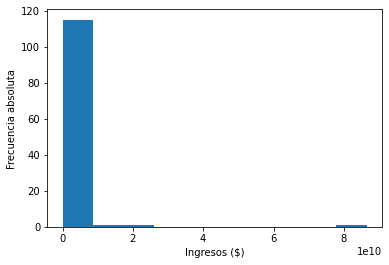

NormaltestResult(statistic=239.96907959190003, pvalue=7.787112570772441e-53)


In [20]:
plt.hist(ingresos_agrupados['INGRESOS_TOTAL_E'])
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia absoluta')
plt.show()
print(sts.normaltest(ingresos_agrupados['INGRESOS_TOTAL_E'])) # no pasa la prueba de normalidad (sesgo)

In [41]:
# cuántos ceros tenemos en las cifras
m = ingresos_agrupados[ingresos_agrupados['INGRESOS_TOTAL_E']!=0]

ingresos_agrupados_transformables = m

ingresos_agrupados_transformables

,index,GRUPO,INGRESOS_TOTAL_E
0,4,AMERICA MOVIL,86559324650.000000000
1,38,GRUPO TELEVISA,18204157323.790000916
2,6,AT&T,14680526078.000000000
3,101,TELEFONICA,6655353071.899999619
4,63,MEGACABLE-MCM,6433334578.200000763
...,...,...,...
109,53,JAIME SANCHEZ SANCHEZ,125171.000000000
110,37,GRUPO CORPORATIVO ZUNUN PAZ,88182.000000000
111,25,EDUARDO PEDRERO PEREZ,68200.000000000
112,48,IGOU TELECOM,61997.030000000


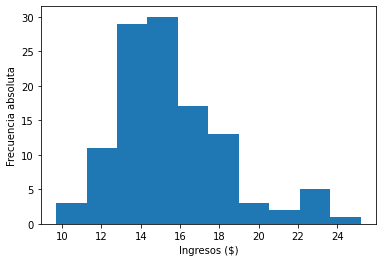

NormaltestResult(statistic=20.667330958740976, pvalue=3.251966809978271e-05)


In [43]:
# Aplicar logarítmos para reducir el efecto de la magnitud de los datos.
ln_ingresos = np.log(ingresos_agrupados_transformables['INGRESOS_TOTAL_E']) 

plt.hist(ln_ingresos)
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia absoluta')
plt.show()
print(sts.normaltest(ln_ingresos)) # no pasa la prueba de normalidad (sesgo)

In [55]:
# Análisis de varianza
var_numpy = np.var(ln_ingresos, ddof = 0)
print(f"La varianza del ln de los ingresos totales en 2021 es de {var_numpy}")
print(f'Lo que implica $ {np.exp(var_numpy)}')

sd_numpy = np.std(ln_ingresos,ddof = 0)
print(f"La desviación estándar del ln de los ingresos totales en 2021 es de {sd_numpy}")
print(f'Lo que implica $ {np.exp(sd_numpy)}')

La varianza del ln de los ingresos totales en 2021 es de 8.089757026085016
Lo que implica $ 3260.8951614995385
La desviación estándar del ln de los ingresos totales en 2021 es de 2.844249817805218
Lo que implica $ 17.18865920496856


In [91]:
var_numpy2 = np.var(ingresos_agrupados['INGRESOS_TOTAL_E'], ddof = 0)
print(f"La varianza del ln de los ingresos totales en 2021 es de {var_numpy2}")

sd_numpy2 = np.std(ingresos_agrupados['INGRESOS_TOTAL_E'],ddof = 0)
print(f"La desviación estándar del ln de los ingresos totales en 2021 es de {sd_numpy2}")


La varianza del ln de los ingresos totales en 2021 es de 6.772754472465604e+19
La desviación estándar del ln de los ingresos totales en 2021 es de 8229674642.697367


In [56]:
# La media
media = np.mean(ln_ingresos)
print(f"La media del ln de los ingresos 202 es de {media}")
print(f'Lo que implica $ {np.exp(media)}')

La media del ln de los ingresos 202 es de 15.551925110683992
Lo que implica $ 5676952.475370145


In [57]:
# Calculando la regla de 68-95-99.7 usando la desviación estándar:
print(f"Casi el 68% de los datos está entre {round(media-sd_numpy,3)} and {round(media+sd_numpy,3)}")
print(f"Casi el 95% de los datos está entre {round(media-2*sd_numpy,3)} and {round(media +2*sd_numpy,3)}")
print(f"Casi el 99.7% de los datos está entre {round(media-3*sd_numpy,3)} and {round(media+3*sd_numpy,3)}")

Casi el 68% de los datos está entre 12.708 and 18.396
Casi el 95% de los datos está entre 9.863 and 21.24
Casi el 99.7% de los datos está entre 7.019 and 24.085


In [59]:
# El score z nos dice el número de desviaciones estándar en el que un dato de ingreso está cerca de la media
z_scipy = sts.zscore(ln_ingresos)
print(f"Los score z es {z_scipy}")

Los score z es [ 3.38654174  2.83835501  2.76271885  2.4845786   2.47264979  2.45924285
  1.88551411  1.76630546  1.52605688  1.37336494  1.25172829  1.16810821
  1.15242846  1.115703    1.10759404  0.98800399  0.97206862  0.96617208
  0.92582449  0.91399133  0.88948858  0.86110258  0.75585214  0.73022418
  0.62129924  0.60631742  0.58670493  0.47978678  0.47255677  0.46848636
  0.42105476  0.33915417  0.32654099  0.3184484   0.3184484   0.30903062
  0.26757697  0.22966976  0.20782113  0.16815543  0.1217837   0.10923857
  0.07374804  0.03910471  0.03395439  0.01592497 -0.00876249 -0.01363698
 -0.01504733 -0.02038301 -0.05453571 -0.09124271 -0.11476189 -0.13207756
 -0.14005073 -0.14712846 -0.18663687 -0.19384552 -0.2013154  -0.2064363
 -0.23917642 -0.24113072 -0.26098485 -0.27677245 -0.29363899 -0.32561024
 -0.36459242 -0.36836634 -0.37608931 -0.3804018  -0.41843045 -0.43587238
 -0.4602558  -0.46329154 -0.47730916 -0.49104055 -0.52448029 -0.53066453
 -0.54496111 -0.55250764 -0.5615096  

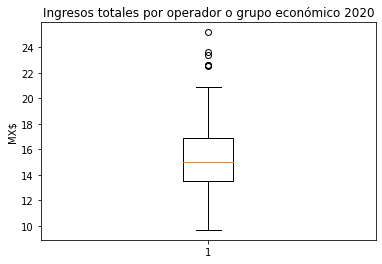

In [60]:
# Prueba de outliers (los grandes operadores)

fig1, ax1 = plt.subplots()
ax1.set_title('Ingresos totales por operador o grupo económico 2021 (ln)')
ax1.set_ylabel('MX$')
ax1.boxplot(ln_ingresos)
plt.show()

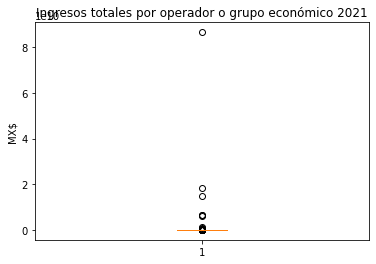

In [92]:
# Prueba de outliers (los grandes operadores)

fig1, ax1 = plt.subplots()
ax1.set_title('Ingresos totales por operador o grupo económico 2021')
ax1.set_ylabel('MX$')
ax1.boxplot(ingresos_agrupados['INGRESOS_TOTAL_E'])
plt.show()

In [85]:
# Análisis con quartiles y rango intercuantil para efectos de identificar los outliers

quartiles = ln_ingresos.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"El cuartil más bajo de los ingresos es: {lowerq}")
print(f"El cuartil más alto de los ingresos es: {upperq}")
print(f"El rango intercuantil de los ingresos es: {iqr}")
print(f"El ingreso medio es: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Valores por debajo {lower_bound} se consideran datos aberrantes.")
print(f"Valores por encima {upper_bound} se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.")



El cuartil más bajo de los ingresos es: 13.51531587998225
El cuartil más alto de los ingresos es: 16.89310031412893
El rango intercuantil de los ingresos es: 3.3777844341466796
El ingreso medio es: 15.010831615680564 
Valores por debajo 8.44863922876223 se consideran datos aberrantes.
Valores por encima 21.95977696534895 se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.


In [86]:
print(f'Los ingresos extremadamente grandes son aquellos que son mayores o iguales a $ {np.exp(upper_bound)}')

Los ingresos extremadamente grandes son aquellos que son mayores o iguales a $ 3443578279.908879


In [87]:
# de la lista de operadores que tienen un ingreso menor al upper bound son:

# Los que quedan dentro del CPO
ingresos_agrupados_transformables[ingresos_agrupados_transformables['INGRESOS_TOTAL_E']<=323700046.14337325].sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)

,index,GRUPO,INGRESOS_TOTAL_E
9,39,GTAC REDES DE FIBRA OPTICA,282197600.000000000
10,58,MARCATEL,199665310.550000012
11,61,MAXCOM,157402483.000000000
12,71,OUI,150537012.189999998
13,46,HNS DE MEXICO,135605863.389999986
...,...,...,...
109,53,JAIME SANCHEZ SANCHEZ,125171.000000000
110,37,GRUPO CORPORATIVO ZUNUN PAZ,88182.000000000
111,25,EDUARDO PEDRERO PEREZ,68200.000000000
112,48,IGOU TELECOM,61997.030000000


In [89]:
ingresos_agrupados_transformables[ingresos_agrupados_transformables['INGRESOS_TOTAL_E']>323700046.14337325].sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)

,index,GRUPO,INGRESOS_TOTAL_E
0,4,AMERICA MOVIL,86559324650.000000000
1,38,GRUPO TELEVISA,18204157323.790000916
2,6,AT&T,14680526078.000000000
3,101,TELEFONICA,6655353071.899999619
4,63,MEGACABLE-MCM,6433334578.200000763
5,105,TOTALPLAY,6192632691.090000153
6,24,DISH-MVS,1211104115.000000000
7,3,ALTAN,862839373.789999962
8,87,STARGROUP,435677179.049999952


In [95]:
# ¿Qué compañías son?
ingresos_por_grupo[ingresos_por_grupo['GRUPO'] in ingresos_agrupados_transformables['GRUPO']]

TypeError: 'Series' objects are mutable, thus they cannot be hashed